### `IGBINEDION JOSHUA EHUNWUNSE`
Innomatics Internship Entrance exam solutions

In [2]:
#Import the required libraries
import pandas as pd
import numpy as np

In [4]:
#Load in the movies dataset
movies = pd.read_csv("movies.csv")

In [6]:
#To find the shape of the movie dataset
movies.shape

(9742, 3)

In [8]:
#Load in the ratings dataset and find the shape
ratings = pd.read_csv("ratings.csv")
ratings.shape

(100836, 4)

In [10]:
#To find the unique "userId"
ratings["userId"].nunique()

610

In [12]:
#First merge the movies and the ratings dataframes
movie_ratings = pd.merge(movies, ratings, on='movieId', how='inner')

In [14]:
#Movie with the maximum number of user ratings
movie_ratings.groupby("title")["rating"].sum().sort_values(ascending=False).head(1)

title
Shawshank Redemption, The (1994)    1404.0
Name: rating, dtype: float64

In [16]:
#Load in the tags dataset as a dataframe and merge it with the movie dataframe
tags = pd.read_csv("tags.csv")
movie_tags = pd.merge(movies, tags, on='movieId', how='inner')

In [18]:
movie_tags

,movieId,title,genres,userId,tag,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1139045764
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474,pixar,1137206825
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,567,fun,1525286013
3,2,Jumanji (1995),Adventure|Children|Fantasy,62,fantasy,1528843929
4,2,Jumanji (1995),Adventure|Children|Fantasy,62,magic board game,1528843932
...,...,...,...,...,...,...
3678,187595,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,62,star wars,1528934552
3679,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,anime,1537098582
3680,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,comedy,1537098587
3681,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,gintama,1537098603


In [20]:
#To get the tags submitted by the users for "Matrix the (1999)" movie
movie_tags_ = movie_tags[["title", "tag"]]
movie_tags_ = movie_tags_[movie_tags_['title'].str.contains("Matrix, The", case=True, na=False)]
movie_tags_

,title,tag
1313,"Matrix, The (1999)",martial arts
1314,"Matrix, The (1999)",sci-fi
1315,"Matrix, The (1999)",alternate universe
1316,"Matrix, The (1999)",philosophy
1317,"Matrix, The (1999)",post apocalyptic


In [22]:
#Create a dataframe for only the Terminator movie, then calculate the average rating for the movie
terminator =movie_ratings[movie_ratings['title'].str.contains('Terminator 2: Judgment Day', case=False, na=False)]
terminator.groupby("title")["rating"].mean()

title
Terminator 2: Judgment Day (1991)    3.970982
Name: rating, dtype: float64

In [24]:
#Create a sub dataframe for the "Fight Club (1999)" movie
fight_club =movie_ratings[movie_ratings['title'].str.contains('Fight Club', case=False, na=False)]
fight_club

,movieId,title,genres,userId,rating,timestamp
49835,2959,Fight Club (1999),Action|Crime|Drama|Thriller,1,5.0,964983282
49836,2959,Fight Club (1999),Action|Crime|Drama|Thriller,4,2.0,945078528
49837,2959,Fight Club (1999),Action|Crime|Drama|Thriller,10,0.5,1455356582
49838,2959,Fight Club (1999),Action|Crime|Drama|Thriller,15,2.5,1510571747
49839,2959,Fight Club (1999),Action|Crime|Drama|Thriller,16,3.5,1377476874
...,...,...,...,...,...,...
50048,2959,Fight Club (1999),Action|Crime|Drama|Thriller,601,5.0,1441639461
50049,2959,Fight Club (1999),Action|Crime|Drama|Thriller,603,4.0,963176105
50050,2959,Fight Club (1999),Action|Crime|Drama|Thriller,606,5.0,1171231517
50051,2959,Fight Club (1999),Action|Crime|Drama|Thriller,608,5.0,1117336631


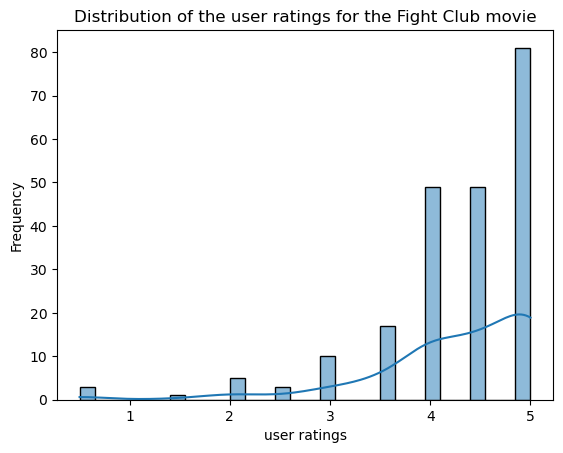

In [26]:
#To visualize the distribution of the rating column of the "Fight club" dataframe using matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(fight_club['rating'], bins=30, kde=True)
plt.xlabel('user ratings')
plt.ylabel('Frequency')
plt.title('Distribution of the user ratings for the Fight Club movie')
plt.show()

The data has a letf skewed distribution

### Important Session 1

In [29]:
#To group "rating" based on the "movieId" using the mean
a = movie_ratings.groupby("movieId")["rating"].mean() #aggregate using average
mean_ratings = pd.DataFrame(a)
mean_ratings

,rating
movieId,
1,3.920930
2,3.431818
3,3.259615
4,2.357143
5,3.071429
...,...
193581,4.000000
193583,3.500000
193585,3.500000


In [30]:
#Rename the rating column on the mean_ratings df to "mean_rating"
mean_ratings = mean_ratings.rename(columns={'rating': 'mean_rating'})

In [31]:
#To group "rating" based on the "movieId" using the mean
count_ratings = movie_ratings.groupby(['movieId', 'rating']).size().reset_index(name='count')
count_ratings

,movieId,rating,count
0,1,0.5,1
1,1,1.5,1
2,1,2.0,6
3,1,2.5,8
4,1,3.0,34
...,...,...,...
30412,193581,4.0,1
30413,193583,3.5,1
30414,193585,3.5,1
30415,193587,3.5,1


In [32]:
#Rename the count column on the count_ratings df to "rating_count"
count_ratings = count_ratings.rename(columns={'count': 'rating_count'})

In [33]:
#To inner join the movie dataframe with the aggregated dataframe
df = movies.merge(mean_ratings, on='movieId', how='inner').merge(count_ratings, on='movieId', how='inner')
df

,movieId,title,genres,mean_rating,rating,rating_count
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92093,0.5,1
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92093,1.5,1
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92093,2.0,6
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92093,2.5,8
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92093,3.0,34
...,...,...,...,...,...,...
30412,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.00000,4.0,1
30413,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.50000,3.5,1
30414,193585,Flint (2017),Drama,3.50000,3.5,1
30415,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.50000,3.5,1


In [38]:
#Now to filter the dataframe display only movies with more than 50 user ratings
filtered_df = df[df['rating_count'] > 50]
filtered_df

,movieId,title,genres,mean_rating,rating,rating_count
6,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,4.0,82
213,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,3.983051,4.0,61
290,47,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,3.975369,4.0,59
292,47,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,3.975369,5.0,52
311,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,4.237745,5.0,71
...,...,...,...,...,...,...
14905,4886,"Monsters, Inc. (2001)",Adventure|Animation|Children|Comedy|Fantasy,3.871212,4.0,52
15149,4993,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy,4.106061,5.0,62
16623,5952,"Lord of the Rings: The Two Towers, The (2002)",Adventure|Fantasy,4.021277,4.0,51
18438,7153,"Lord of the Rings: The Return of the King, The...",Action|Adventure|Drama|Fantasy,4.118919,4.0,53


In [41]:
#Most popular movie based on average user rating
filtered_df.groupby("title")["mean_rating"].max().sort_values(ascending = False).head(1)

title
Shawshank Redemption, The (1994)    4.429022
Name: mean_rating, dtype: float64

In [44]:
#Top 5 movies based on the number of ratings
filtered_df.groupby("title")["rating_count"].max().sort_values(ascending = False).head()

title
Shawshank Redemption, The (1994)             153
Pulp Fiction (1994)                          123
Forrest Gump (1994)                          116
Matrix, The (1999)                           109
Star Wars: Episode IV - A New Hope (1977)    104
Name: rating_count, dtype: int64

In [46]:
#The "sci-fi" movie that is third most popular based on the number of user ratings
filtered_df.groupby(["title", "genres"])["rating_count"].max().sort_values(ascending = False).head(20)

title                                                                           genres                                     
Shawshank Redemption, The (1994)                                                Crime|Drama                                    153
Pulp Fiction (1994)                                                             Comedy|Crime|Drama|Thriller                    123
Forrest Gump (1994)                                                             Comedy|Drama|Romance|War                       116
Matrix, The (1999)                                                              Action|Sci-Fi|Thriller                         109
Star Wars: Episode IV - A New Hope (1977)                                       Action|Adventure|Sci-Fi                        104
Silence of the Lambs, The (1991)                                                Crime|Horror|Thriller                           97
Jurassic Park (1993)                                                            Action|Adv

From the above, "Jurassic Park(1993) is the third most popular Sci-fi movie based on the number of ratings

### Important Session 2 (Webscraping)

In [ ]:
import requests
from bs4 import BeautifulSoup

def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0" * n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    
    request_header = {
        'Content-Type': 'text/html; charset=UTF-8', 
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0', 
        'Accept-Encoding': 'gzip, deflate, br'
    }
    
    try:
        response = requests.get(URL, headers=request_header)
        response.raise_for_status()  # Check for request errors
    except requests.RequestException as e:
        print(f"Request failed for ID {imdbId}: {e}")
        return np.nan

    soup = BeautifulSoup(response.text, 'html.parser')
    imdb_rating = soup.find('span', {'itemprop': 'ratingValue'})  # Updated attribute to locate rating
    
    return imdb_rating.text if imdb_rating else np.nan

# Load IMDb IDs from a CSV file
df = pd.read_csv('links.csv')
imdb_ids = df['imdbId'].tolist()

# Create a DataFrame to store results
results = []

for imdb_id in imdb_ids:
    rating = scrapper(imdb_id)
    results.append({'IMDb_ID': imdb_id, 'Rating': rating})
    time.sleep(2)  # Delay to prevent rate limiting

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Save results to a CSV file
results_df.to_csv('imdb_ratings.csv', index=False)
